In [18]:
#Importing visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [19]:
matplotlib.__version__

'3.4.3'

In [20]:
# This option ensures the charts are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [21]:
# Define path

path = r'C:\Users\dbnew\Achievement_6'

In [22]:
#Import data
df = pd.read_pickle(os.path.join(path, 'Prepared_Data', 'air_qual_cleaned.pkl'))

### Creating a correlation heatmap using seaborn

In [23]:
df.columns

Index(['WHO Region', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database'],
      dtype='object')

In [24]:
# Create a subset excluding the "Measurement Year", "Reference", and "Number and type of monitoring statiosn", and "Version of the database"
sub=df[['WHO Region', 'WHO Country Name', 'City or Locality', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)','PM25 temporal coverage (%)', 'PM10 temporal coverage (%)','NO2 temporal coverage (%)']]

In [25]:
sub

,WHO Region,WHO Country Name,City or Locality,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%)
0,African Region,South Africa,Buffalo City,12.63,29.04,10.88,75.0,75.0,75.0
1,African Region,South Africa,Capricorn Dm,18.91,37.40,NaN,75.0,75.0,NaN
2,African Region,South Africa,City Of Cape Town,14.86,36.34,17.20,75.0,75.0,75.0
3,African Region,South Africa,City Of Johannesburg,35.47,54.22,38.83,75.0,75.0,75.0
4,African Region,South Africa,City Of Tshwane,23.39,130.19,21.12,75.0,75.0,75.0
...,...,...,...,...,...,...,...,...,...
32126,Eastern Mediterranean Region,Bahrain,Manama,NaN,109.80,NaN,NaN,NaN,NaN
32127,Eastern Mediterranean Region,Bahrain,Zallaq,NaN,254.70,NaN,NaN,NaN,NaN
32128,Eastern Mediterranean Region,Bahrain,Askar,NaN,196.00,NaN,NaN,NaN,NaN
32129,Eastern Mediterranean Region,Bahrain,Manama,NaN,120.50,NaN,NaN,NaN,NaN


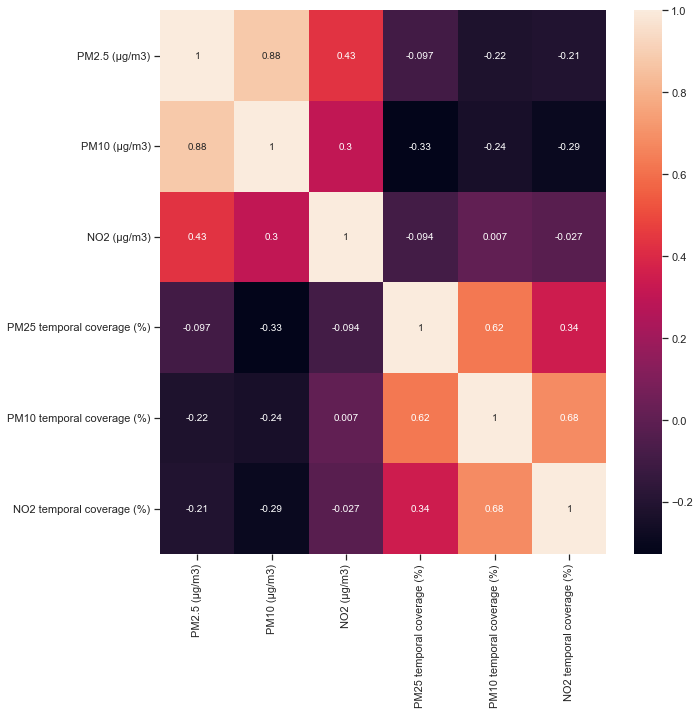

In [26]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The strongestc correlation is between PM2.5 and PM10. This tells us that these two different types of pollution tend to go hand-in-hand. The same is true for the temporal coverages, although the correlation is not quite as strong, but it makes sense that measuring institutions would measure both types of pollution with similar frequencies. The PM concentrations are not quite as strongly correlated wtih NO2 concentrations, possibly indicating they have different sources. Interestingly, the relationship between PM10 and NO2 temporal coverage is nearly double the strength of the relationship between PM2 and N02, suggesting that PM10 and NO2 may be measured together or by the same devices.

### Scatterplots

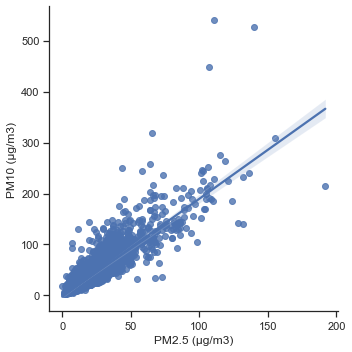

In [27]:
# Create a scatterplot for the "PM 2.5" and "PM 10" columns in seaborn

sns.lmplot(x = 'PM2.5 (μg/m3)', y = 'PM10 (μg/m3)', data = df)

The scatterplot confirms a strong relationship between these two types of pollution. The outliers between 100 and 125 on the x axis might be worth investigating.

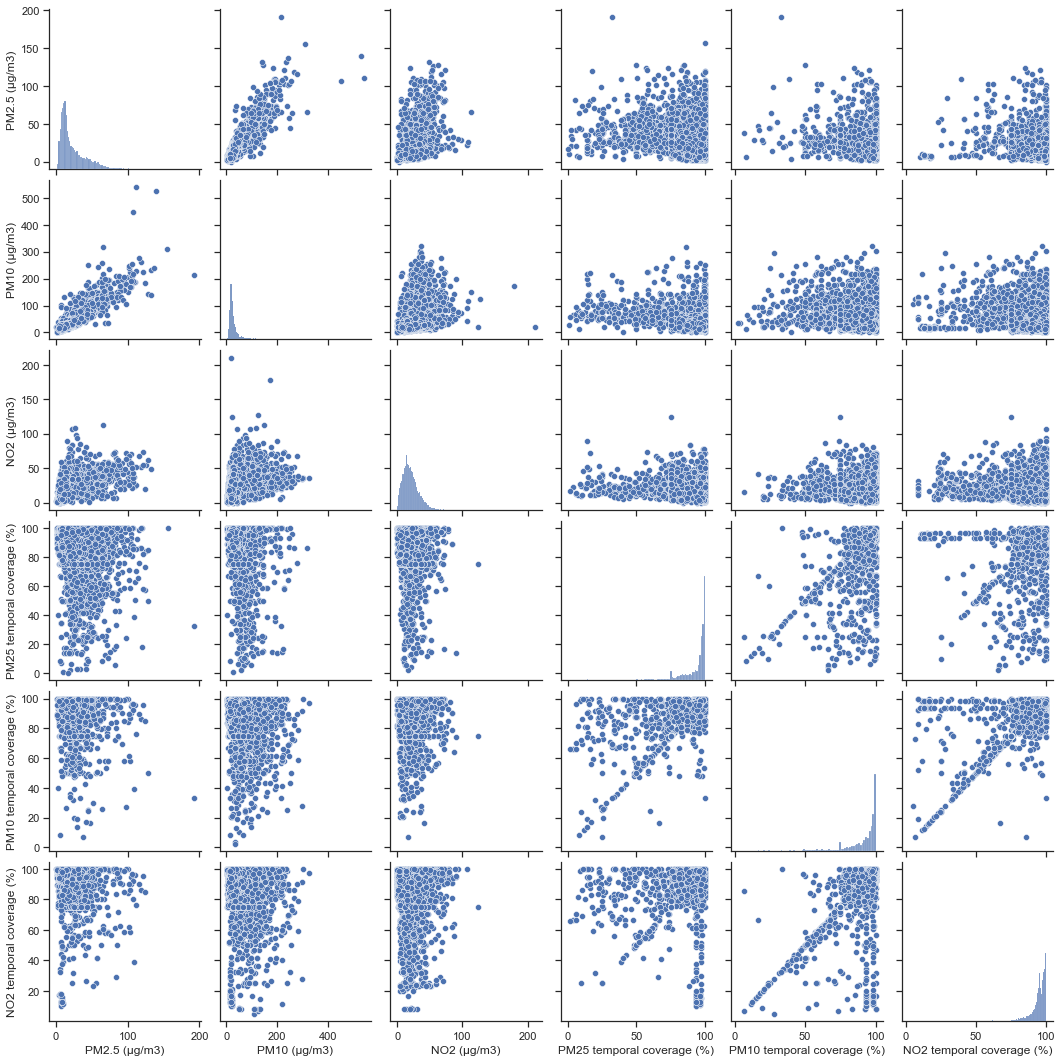

In [28]:
g = sns.pairplot(sub)

Strongest relationships are between the different types of particulate matter and the different temporal coverages. As noted above, PM10 temporal coverage has a relatively strong correlation with NO2 temporal coverage.

<AxesSubplot:xlabel='PM2.5 (μg/m3)', ylabel='Count'>

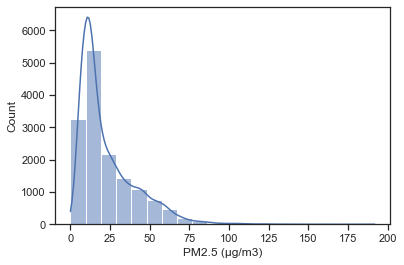

In [29]:
# Creating a histogram for PM2.5
sns.histplot(df['PM2.5 (μg/m3)'], bins = 20, kde = True)

In [30]:
df.loc[df['PM2.5 (μg/m3)'] <= 5, 'Health Indicator'] = 'Acceptable'

In [31]:
df.loc[(df['PM2.5 (μg/m3)'] > 5) & (df['PM2.5 (μg/m3)'] < 25), 'Health Indicator'] = 'Unhealthy'

In [32]:
df.loc[df['PM2.5 (μg/m3)'] >= 25, 'Health Indicator'] = 'Catastrophic'

In [33]:
df['Health Indicator'].value_counts(dropna = False)

NaN             17143
Unhealthy        9438
Catastrophic     4926
Acceptable        624
Name: Health Indicator, dtype: int64

In [34]:
# Clean the data by dropping rows with NaN in relevant columns
df_clean = df.dropna(subset=["PM25 temporal coverage (%)", "PM2.5 (μg/m3)", "Health Indicator"])

# Check if the cleaning worked
print(df_clean.isna().sum())


WHO Region                                   0
WHO Country Name                             0
City or Locality                             0
Measurement Year                             0
PM2.5 (μg/m3)                                0
PM10 (μg/m3)                              5071
NO2 (μg/m3)                               4584
PM25 temporal coverage (%)                   0
PM10 temporal coverage (%)                5091
NO2 temporal coverage (%)                 4783
Reference                                    0
Number and type of monitoring stations    4500
Version of the database                      0
Health Indicator                             0
dtype: int64


In [ ]:
# Create a categorical plot in seaborn using the health indicators created above
sns.set(style="ticks")
c = sns.catplot(x="PM25 temporal coverage (%)", y="PM2.5 (μg/m3)", hue="Health Indicator", data=df_clean)

Unfortunately, my computer hangs when trying to execute the above command. Please send some more RAM my way, if that's the issue.

None of my previous questions are answered by this exploratory analysis. However, it raises a new question: Are unhealthy levels of PM2.5 correlated with unhealthy levels of PM10 or NO2? Would need to filter the data based on WHO guidelines (or another set of guidelines) to find out.

Possible hypotheses: Countries with dangerous levels of one pollutant are likely to have dangerous levels of at least one of the other pollutants measured. Countries with more temporal coverage are likely to have lower levels of pollutants.